# Graph Theory Project

by [Ethan Conneely](https://github.com/IrishBruse?tab=repositories) (G00393941)

## Graph isomorphism problem

> The graph isomorphism problem is the computational problem of determining whether two finite graphs are isomorphic.  
> The problem is not known to be solvable in polynomial time nor to be NP-complete, and therefore may be in the computational complexity class NP-intermediate.  

[Wikipedia](https://en.wikipedia.org/wiki/Graph_isomorphism_problem)

## Youtube

I watched this video for a visual explanation of what graph isomorphism is  
[Video](https://www.youtube.com/watch?v=EwV4Puk2coU)

## What is a Graph
A graph is a mathematical concept where vertices are connected by way of edges defining the relationship between said vertices.

![Graphs With 5 Edges](Images/Graphs%20With%205%20Edges.png)  
Image of graphs With 5 edges  

## What the Graph Isomorphism Problem is
The graph isomorphism problem is a problem in computer science and mathematics.  
It is used to determine whether two given graphs are isomorphic or not.  
A graph isomorphism is a bijective mapping between the vertices of two graphs that preserves the edges.  
In other words, two graphs are isomorphic if their nodes can be reorganized in a way that preserves the connectivity of the edges between them.  

## Applications of Graph Isomorphism Problem
The graph isomorphism problem has many practical applications in different fields such as computer science, chemistry, and physics.  
In computer science, graph isomorphism is used in database matching, network analysis, and software verification.   
In chemistry, graph isomorphism is used to study molecular structure, while in physics, it is used to study the topology of physical systems.  


# Code Examples

Libraries used

In [66]:
import networkx as nx
import matplotlib.pyplot as plt
import itertools as it
import numpy as np

With networkx in python we can define a graph with the following syntax

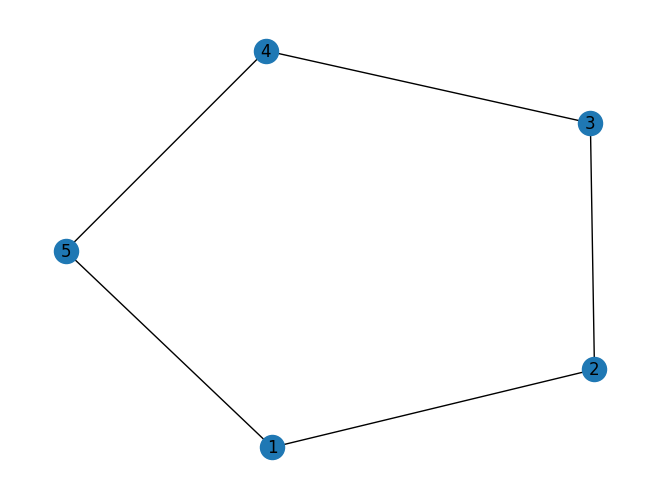

In [67]:
NumberGraph = nx.Graph()
NumberGraph.add_nodes_from([1,2,3,4,5])
NumberGraph.add_edges_from([(1,2),(2,3),(3,4),(4,5),(5,1)])

nx.draw(NumberGraph, with_labels=True)

Next we draw 2 graphs side by side with matplotlib.
We can define nodes with letter or numbers or any piece of data we wish

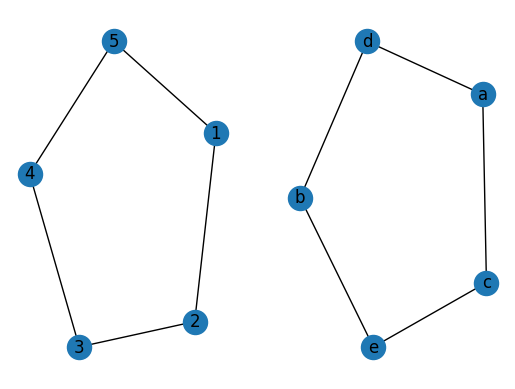

In [68]:
NumberGraph = nx.Graph()
NumberGraph.add_nodes_from([1,2,3,4,5])
NumberGraph.add_edges_from([(1,2),(2,3),(3,4),(4,5),(5,1)])

LetterGraph = nx.Graph()
LetterGraph.add_nodes_from(["a","b","c","d","e"])
LetterGraph.add_edges_from([("a","c"),("b","d"),("c","e"),("d","a"),("e","b")])

plt.subplot(1,2,1) # Draw the first graph at index 1
nx.draw(NumberGraph,with_labels=True)

plt.subplot(1,2,2) # Draw the second graph at index 2
nx.draw(LetterGraph,with_labels=True)

plt.show()

Networkx comes with a builtin algorithm for detecting if graphs are isomorphic.  
Below we check the letter graph and number graph from before to test if they are isomorphic.  

In [69]:
nx.is_isomorphic(LetterGraph,NumberGraph)

True

Yes they are indeed isomorphic to one another as a graph does not need to have the same vertices/nodes for them to be isomorphic only the same connections/edges.

Using iter tools we can generate all the permutations of a graphs nodes easily we could use this as a way to test if 2 graphs are isomorphic.  
The only issue with that is it grows in factorial time which mean it only takes a few elements before it would take more memory and time than the total available on earth today combined.

In [70]:
nodes = it.permutations(np.array(["a","b","c","d","e"]))

count = 0

for node in nodes:
    count += 1

print("Number of permutations: "+str(count))


Number of permutations: 120
